### Part 1: Binary Classification

In [1]:
# Importing breast cancer dataset and putting it into a pandas dataframe
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer_data = load_breast_cancer()
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df.insert(30, "malignant", cancer_data.target)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [2]:
# Apply the DecisionTree classifier to the breast cancer dataset

# Run Decision Tree Classifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into X and Y
x_data = cancer_df.iloc[:,0:30]
y_data = cancer_df.iloc[:,30]

# Get training and test sets with 70% for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=66)

classify0 = tree.DecisionTreeClassifier()
classify0.fit(x_train, y_train)
y_predict = classify0.predict(x_test)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

Coefficient of determination (r2): 0.80


In [3]:
# Compute the confusion matrix

import sklearn.metrics as metrics

confuse_matrix = metrics.confusion_matrix(y_test, y_predict)
confuse_matrix

array([[ 57,   4],
       [  4, 106]], dtype=int64)

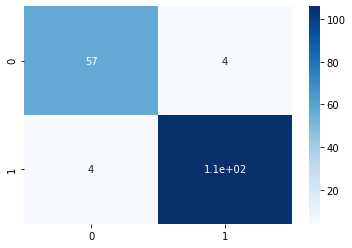

In [4]:
# Create a heatmap of the confusion matrix

import seaborn as sns

sns.heatmap(confuse_matrix, annot=True, cmap="Blues")

In [5]:
# Use the classification report function

print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        61
           1       0.96      0.96      0.96       110

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### Part 2: Multi-Class Classification

In [6]:
# Import data
from sklearn.datasets import load_digits
digits_data = load_digits()
digits_df = pd.DataFrame(digits_data.data, columns=digits_data.feature_names)
digits_df.insert(64, "target", digits_data.target)
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
# Apply DecisionTree classifier

del x_train, x_test, y_train, y_test
# Split data into X and Y
x_data = digits_df.iloc[:,0:64]
y_data = digits_df.iloc[:,64]

# Get training and test sets with 70% for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=66)

classify1 = tree.DecisionTreeClassifier()
classify1.fit(x_train, y_train)
y_predict = classify1.predict(x_test)

# Inspect results
print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_predict))

Coefficient of determination (r2): 0.64


In [8]:
# Compute the confusion matrix
confuse_matrix = metrics.confusion_matrix(y_test, y_predict)
confuse_matrix

array([[55,  0,  1,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  2,  2,  0,  1,  0,  1,  2,  3],
       [ 1,  1, 43,  1,  0,  0,  3,  0,  1,  1],
       [ 0,  1,  3, 34,  1,  1,  1,  0,  2,  4],
       [ 1,  2,  0,  0, 48,  1,  4,  0,  3,  0],
       [ 0,  0,  0,  1,  2, 49,  0,  0,  3,  3],
       [ 0,  0,  0,  1,  0,  3, 53,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0, 40,  1,  1],
       [ 1,  3,  1,  1,  1,  0,  0,  1, 33,  3],
       [ 1,  1,  0,  4,  1,  4,  0,  3,  2, 50]], dtype=int64)

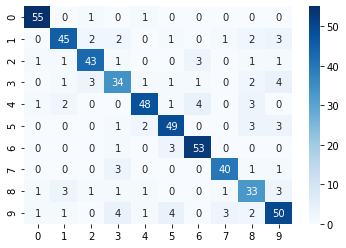

In [9]:
# Create the heatmap
sns.heatmap(confuse_matrix, annot=True, cmap="Blues")

In [10]:
# Use classification_report function
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        57
           1       0.85      0.80      0.83        56
           2       0.86      0.84      0.85        51
           3       0.72      0.72      0.72        47
           4       0.89      0.81      0.85        59
           5       0.83      0.84      0.84        58
           6       0.87      0.93      0.90        57
           7       0.89      0.89      0.89        45
           8       0.70      0.75      0.73        44
           9       0.77      0.76      0.76        66

    accuracy                           0.83       540
   macro avg       0.83      0.83      0.83       540
weighted avg       0.83      0.83      0.83       540

